# Autoencoder Refresher

This Jupyter notebook serves as a refresher on autoencoders. 

## Overview

Autoencoders are a type of artificial neural network used for learning efficient codings of input data. They are unsupervised learning models that use backpropagation, setting the target values to be equal to the inputs.

## Contents

1. **Importing Necessary Libraries**: We start by importing the necessary Python libraries for our tasks.
2. **Data Preparation**: This section covers the loading and preprocessing of data.
3. **Model Building**: Here, we define and compile our autoencoder model.
4. **Model Training & Results Visualization**: We train our model using our prepared data and visualize the results of our autoencoder using various plots.
5. **Experiment**: Finally, we experiment with data generation.


### Importing Necessary Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils import *

### Data Preparation

In [2]:
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9
fashion_mnist = tf.keras.datasets.fashion_mnist  # 28x28 images of clothing items

(x_train1, y_train), (x_test1, y_test) = mnist.load_data()
x_train1 = x_train1 / 255.0  # normalize pixel values to be between 0 and 1
x_test1 = x_test1 / 255.0

### Model Building

In [3]:
class AutoEncoder(tf.keras.Model):
    def __init__(self, input_shape=(28, 28, 1)):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=input_shape),
                tf.keras.layers.Conv2D(
                    16, (3, 3), activation="relu", padding="same", strides=2
                ),
                tf.keras.layers.Conv2D(
                    8, (3, 3), activation="relu", padding="same", strides=2
                ),
            ]
        )
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.Conv2DTranspose(
                    8, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2DTranspose(
                    16, kernel_size=3, strides=2, activation="relu", padding="same"
                ),
                tf.keras.layers.Conv2D(
                    1, kernel_size=(3, 3), activation="sigmoid", padding="same"
                ),
            ]
        )

    def decode(self, x):
        return self.decoder(x)

    def encode(self, x):
        return self.encoder(x)

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()

In [4]:
model1 = AutoEncoder()
model1.compile(optimizer="adam", loss="mse")

### Model Training & Results Visualization

In [5]:
model1.fit(
    x_train1, x_train1, epochs=10, shuffle=True, validation_data=(x_test1, x_test1)
)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.0110 - val_loss: 0.0016
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0011 - val_loss: 9.5024e-04
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 8.6534e-04 - val_loss: 7.9111e-04
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 7.7097e-04 - val_loss: 7.2959e-04
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 7.2706e-04 - val_loss: 6.9488e-04
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 6.9825e-04 - val_loss: 6.7133e-04
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 6.7764e-04 - val_loss: 6.5390e-04
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 6.6003e-04 - val_loss: 6.4010e-04
Epoch 10/10
1875/1875

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                      

1/1 [==============================] - 0s 167ms/step


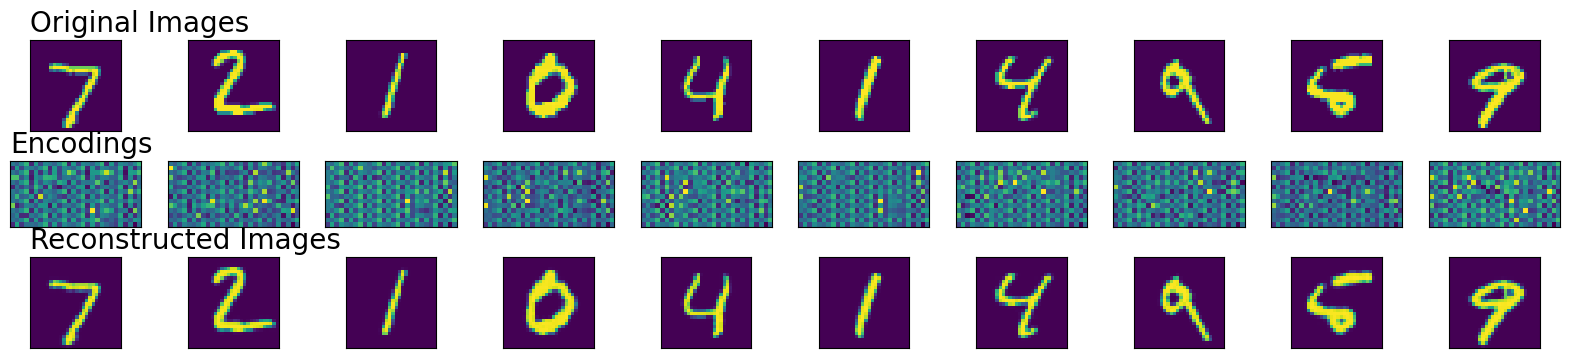

In [7]:
plot_reconstructed_images_and_encodings(
    x_test1[:10],
    tf.reshape(model1.encode(x_test1[:10]), (10, 14, -1)),
    model1.predict(x_test1[:10]),
)

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0  # normalize pixel values to be between 0 and 1
x_test = x_test / 255.0
model2 = AutoEncoder(input_shape=(28, 28, 1))
model2.compile(optimizer="adam", loss="mse")
model2.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0129 - val_loss: 0.0046
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [9]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                    

1/1 [==============================] - 0s 237ms/step


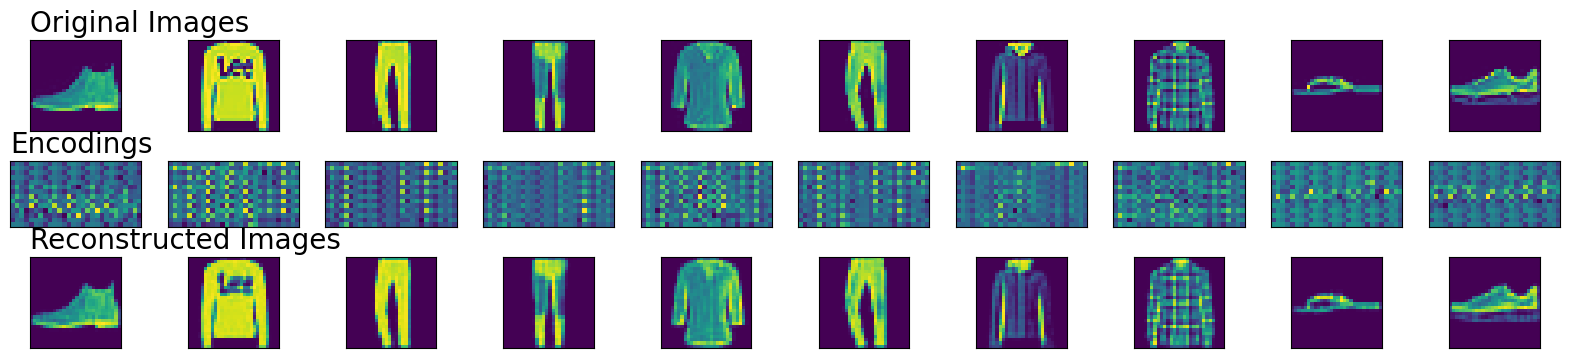

In [10]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model2.encode(x_test[:10]), (10, 14, -1)),
    model2.predict(x_test[:10]),
)

1/1 [==============================] - 0s 31ms/step


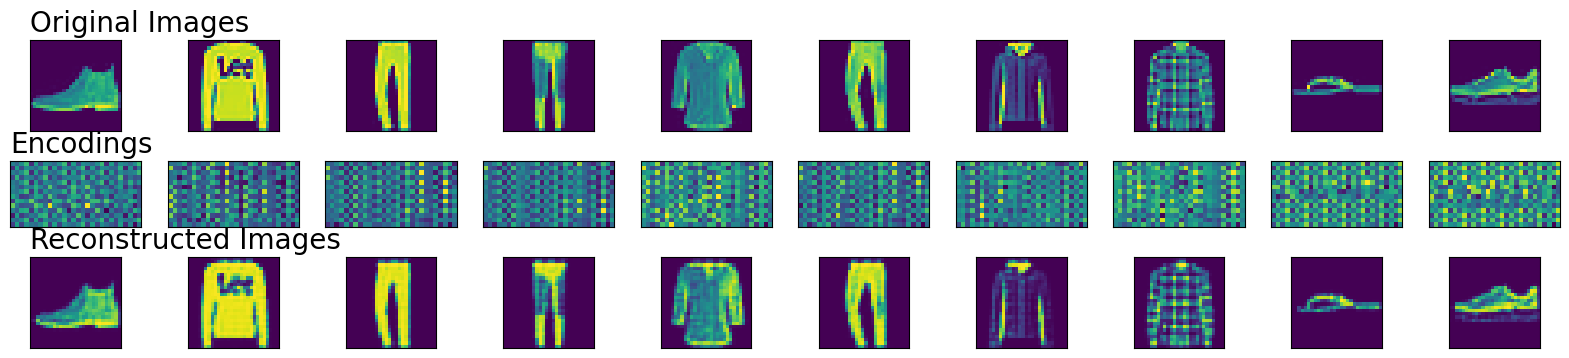

In [11]:
plot_reconstructed_images_and_encodings(
    x_test[:10],
    tf.reshape(model1.encode(x_test[:10]), (10, 14, -1)),
    model1.predict(x_test[:10]),
)

In [12]:
model1.evaluate(x_test, x_test)  # digit model on fashion data

313/313 [==============================] - 1s 4ms/step - loss: 0.0090


0.008973554708063602

In [13]:
model2.evaluate(x_test1, x_test1)  # fashion model on digit data

313/313 [==============================] - 1s 4ms/step - loss: 0.0013


0.0013398726005107164

1/1 [==============================] - 0s 36ms/step


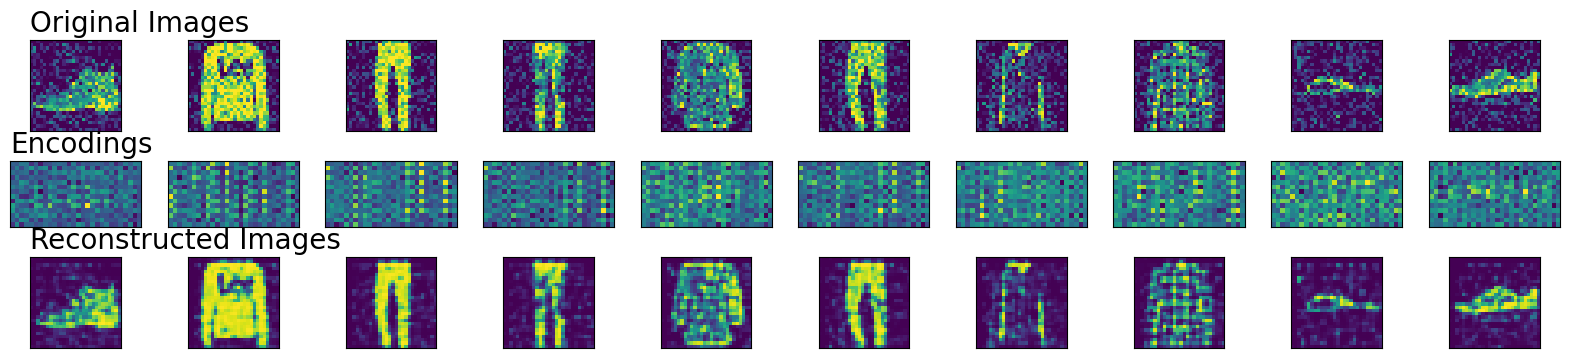

In [14]:
plot_reconstructed_images_and_encodings(
    noisified_x_test := noisify(x_test[:10], "static"),
    tf.reshape(model1.encode(noisified_x_test[:10]), (10, 14, -1)),
    model1.predict(noisified_x_test[:10]),
)

1/1 [==============================] - 0s 24ms/step


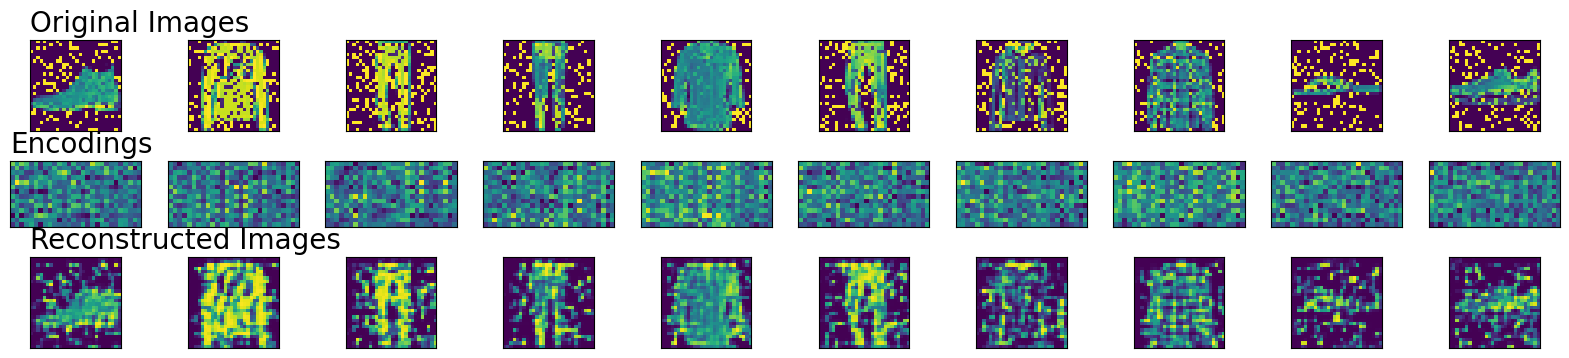

In [15]:
plot_reconstructed_images_and_encodings(
    noisified_x_test := noisify(x_test[:10], "b&p"),
    tf.reshape(model1.encode(noisified_x_test[:10]), (10, 14, -1)),
    model1.predict(noisified_x_test[:10]),
)

### Experiment

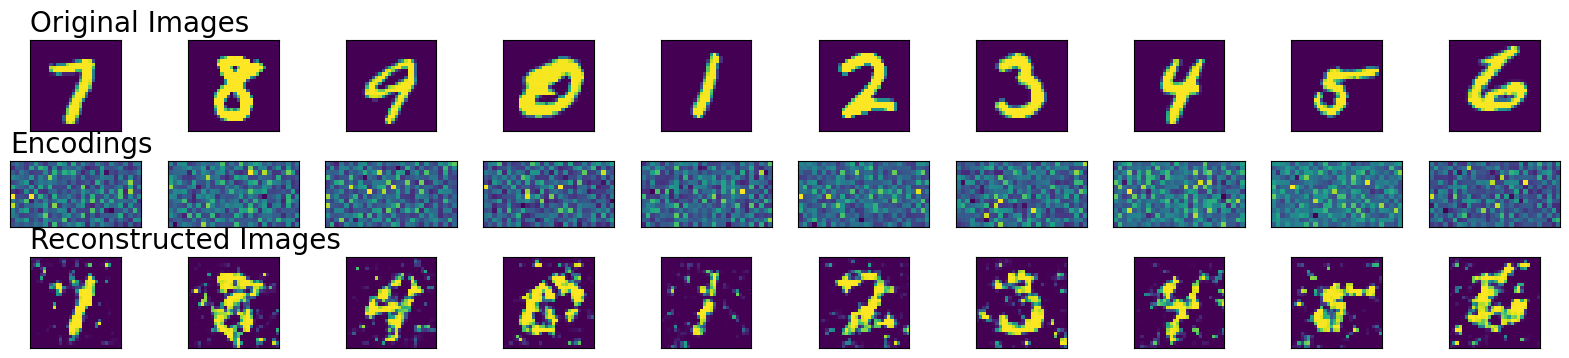

In [37]:
modified_encondings = model1.encode(x_test1[-10:]) * np.random.normal(
    1, 0.5, (10, 7, 7, 8)
)
generated_images = model1.decode(modified_encondings)
plot_reconstructed_images_and_encodings(
    x_test1[-10:], tf.reshape((modified_encondings), (10, 14, -1)), generated_images
)

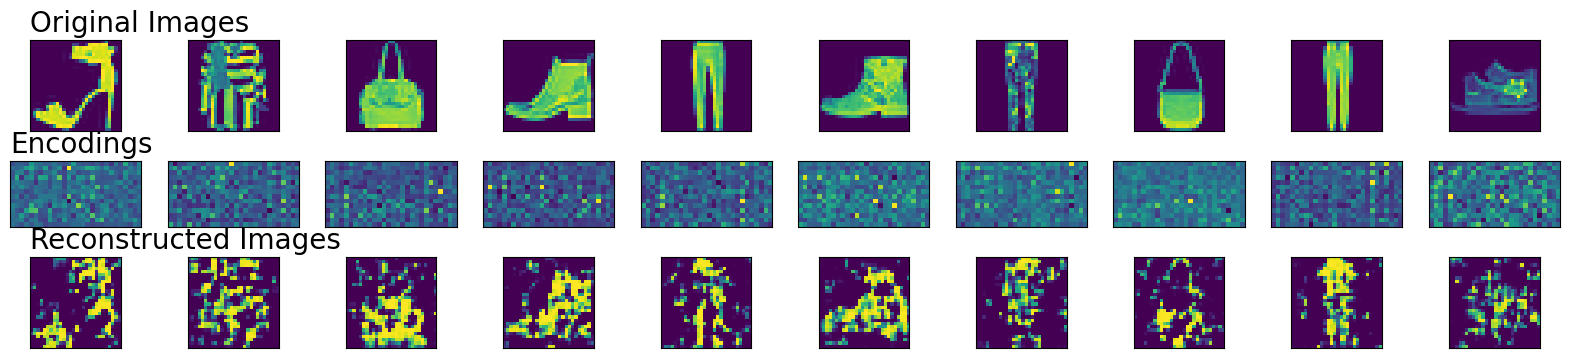

In [38]:
modified_encondings = model2.encode(x_test[-10:]) * np.random.normal(
    1, 0.5, (10, 7, 7, 8)
)
generated_images = model2.decode(modified_encondings)
plot_reconstructed_images_and_encodings(
    x_test[-10:], tf.reshape((modified_encondings), (10, 14, -1)), generated_images
)

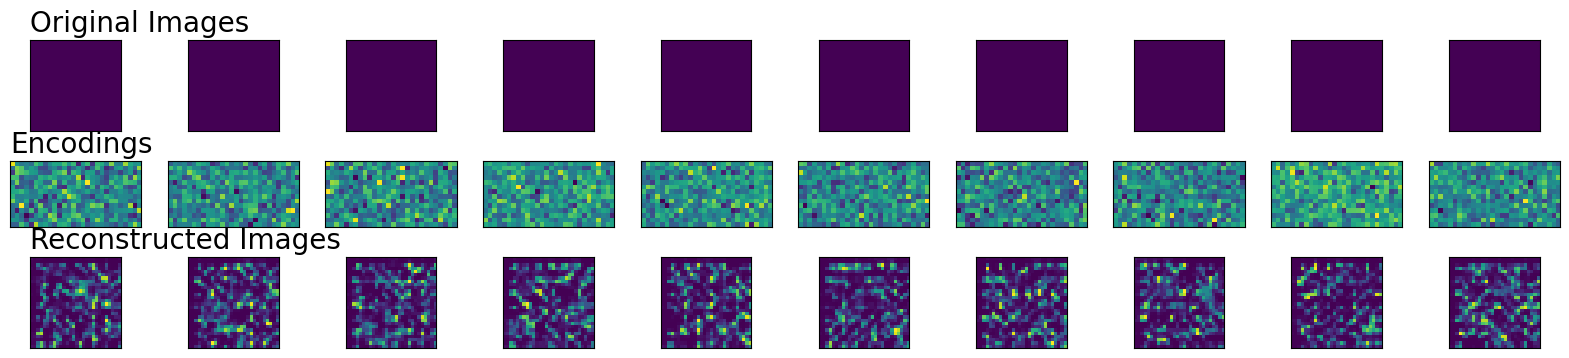

In [40]:
modified_encondings = np.random.normal(1, 0.3, (10, 7, 7, 8))
generated_images = model1.decode(modified_encondings)
plot_reconstructed_images_and_encodings(
    np.zeros(shape=(10, 28, 28, 1)),
    tf.reshape((modified_encondings), (10, 14, -1)),
    generated_images,
)

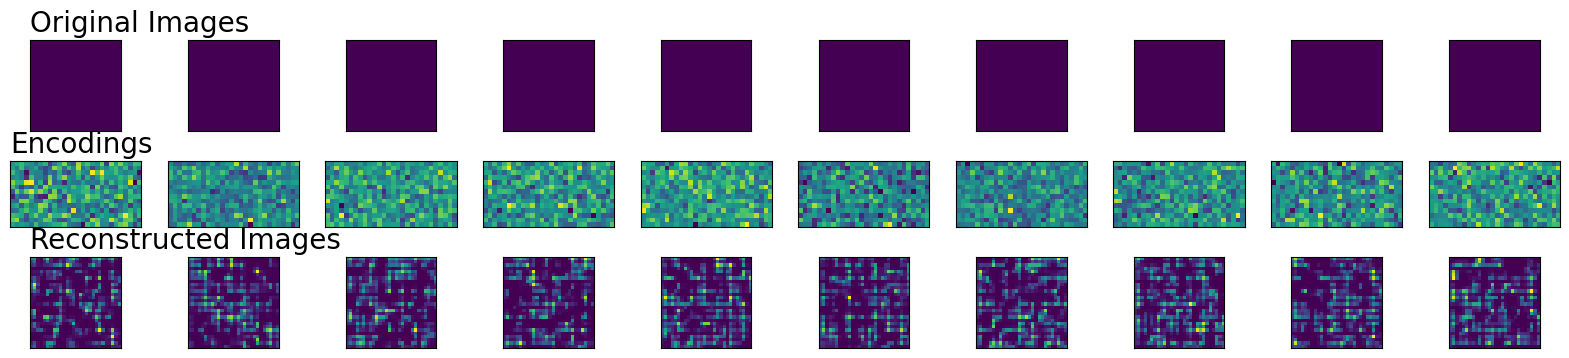

In [41]:
modified_encondings = np.random.normal(1, 0.3, (10, 7, 7, 8))
generated_images = model2.decode(modified_encondings)
plot_reconstructed_images_and_encodings(
    np.zeros(shape=(10, 28, 28, 1)),
    tf.reshape((modified_encondings), (10, 14, -1)),
    generated_images,
)

As we can see, latent space doesn't seem to have a proper distribution and can only manage to spit out garbage if the decoder is fed random noise.
In the next notebook we expirement with variational auto encoder (VAE) which is an autoencoder whose encodings distribution is regularised during the training in order to ensure that its latent space has good properties allowing us to generate some new data.